In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# !pip install minisom
from minisom import MiniSom

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
def som_pie_grid(som, data, labels):
    """Helper to create piechart grid viz
  
  Example: https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/resulting_images/som_iris_pies.png

  :param som: fitted MiniSom instance
  :param data: the data the MiniSom was fit to
  :param labels: an array of labels to use for coloring visual
  """
    labels_map = som.labels_map(data, labels)
    label_names = np.unique(labels)

    plt.figure(figsize=(70, 70))
    the_grid = GridSpec(70, 70)
    for position in labels_map.keys():
        label_fracs = [labels_map[position][lab] for lab in label_names]
        plt.subplot(the_grid[position[1] - 12, position[0]], aspect=1)
        patches, texts = plt.pie(label_fracs)

    plt.show()

    # Cheating way to align legend, create a separate figure just
    # for legend.  Will have superfluous whitespace below
    plt.legend(patches, label_names, loc="upper left", ncol=5)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>

* Read in the data from `data_url`
* Drop all NAs
* Filter based on the `'Pos'` column to where only have the positions `['C', 'PG', 'SG']` remain
* Drop all non-numeric columns
* Scale the data

In [4]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"

<IPython.core.display.Javascript object>

In [6]:
df = pd.read_csv(data_url)
df.head()

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


<IPython.core.display.Javascript object>

In [25]:
df = df[df["Pos"].isin(["C", "PG", "SG"])]
df = df.dropna()

<IPython.core.display.Javascript object>

In [26]:
X = df.select_dtypes(include="number")
y = df["Pos"]

<IPython.core.display.Javascript object>

In [27]:
X.isna().sum()

Seas    0
Age     0
G       0
GS      0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
eFG%    0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
dtype: int64

<IPython.core.display.Javascript object>

In [28]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

* Fit a `MiniSom` instance to the scaled data
  * Choose your own grid size
  * Set a `random_seed` to have reproducible results
  * Initialize the `MiniSom` weight vectors using `.pca_weights_init()` or `.random_weights_init()`
  * Train the model using `.train_random()` or `.train_batch()`

In [21]:
X.shape

(1315, 27)

<IPython.core.display.Javascript object>

In [30]:
std_X

array([[ 1.32732759, -0.30185086, -0.92898999, ..., -0.91267424,
        -0.07384695, -0.6525346 ],
       [ 1.32732759, -1.01614182, -0.80531519, ..., -0.55829131,
        -0.62012501, -1.00104968],
       [ 1.32732759, -0.30185086,  1.09103185, ...,  0.50485749,
         1.1552787 ,  0.77471765],
       ...,
       [-1.42264734, -0.77804484, -0.51674064, ..., -0.55829131,
        -1.43954211, -0.90147394],
       [-1.42264734,  0.88863408,  0.01918353, ..., -0.7945466 ,
        -1.16640308, -0.32061547],
       [-1.42264734, -0.77804484,  0.8024573 , ..., -0.44016366,
         1.42841773, -0.08827208]])

<IPython.core.display.Javascript object>

In [39]:
n_cols = X.shape[1]
grid_rows = 12
grid_cols = 12

som = MiniSom(x=grid_rows, y=grid_cols, input_len=n_cols, random_seed=34)

som.pca_weights_init(std_X)

# Train the som "net"
som.train_random(std_X, num_iteration=100)

<IPython.core.display.Javascript object>

* Use the helper function defined at the top of the notebook to plot the SOM's fit
  * Use the players' positions (the `'Pos'` column) as the labels in the viz
  * Experiment with the SOM's grid size, initialization method, and training method.  Decide a 'good' fit using this visual as guidance.

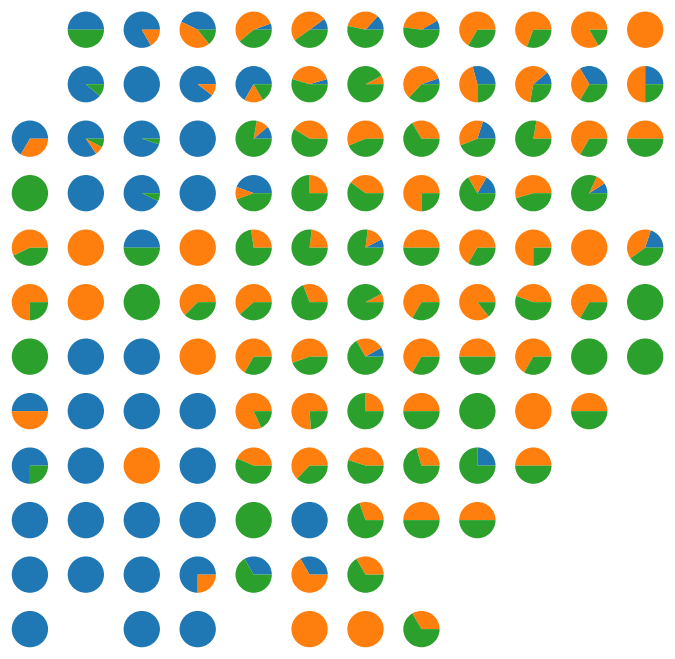

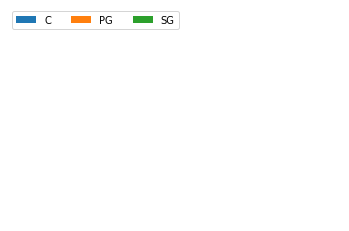

<IPython.core.display.Javascript object>

In [40]:
som_pie_grid(som, std_X, y)

* Perform dimension reduction (to 2d) with another method (perhaps `PCA` or `TSNE`).
* Create a scatter plot of the results of this dimension reduction and color the scatter plot by the players' positions (the `'Pos'` column).
  * How do these results compare to that of the SOM? What are the pros and cons of the different approaches you took in this notebook?

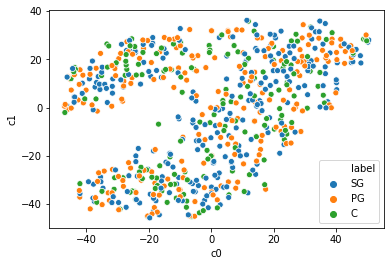

<IPython.core.display.Javascript object>

In [46]:
tsne = TSNE(n_components=2, perplexity=30, n_jobs=-1, n_iter=2000)
tsne_df = pd.DataFrame(tsne.fit_transform(std_X), columns=["c0", "c1"])
tsne_df["label"] = y
sns.scatterplot("c0", "c1", hue="label", data=tsne_df)

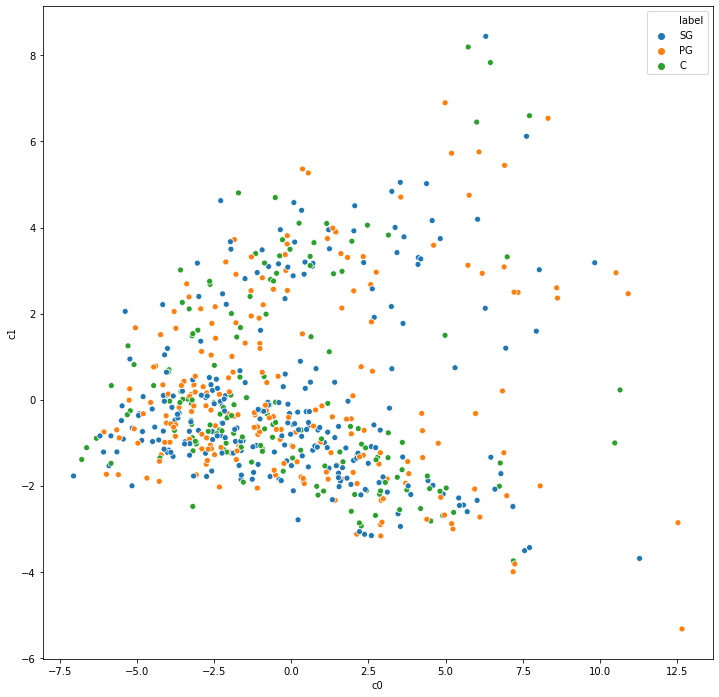

<IPython.core.display.Javascript object>

In [49]:
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(std_X), columns=["c0", "c1"])
pca_df["label"] = y
plt.figure(figsize=(12, 12))
sns.scatterplot("c0", "c1", hue="label", data=pca_df)

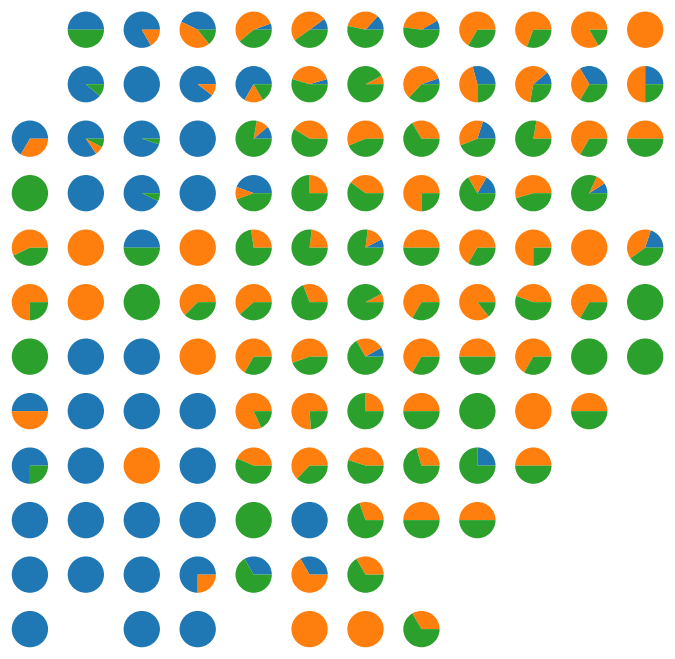

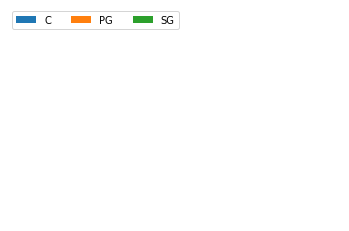

<IPython.core.display.Javascript object>

In [48]:
som_pie_grid(som, std_X, y)

In [64]:
df_copy = pd.DataFrame(std_X.copy())

df_copy["winner_x"] = np.nan
df_copy["winner_y"] = np.nan
df_copy["winner_id"] = np.nan


for i, row in pd.DataFrame(std_X).iterrows():
    # convert row to numpy array
    row_np = row.values

    #     find the node of the net closest to location
    winner_loc = som.winner(row_np)

    # break out the location into x, y components
    winner_x, winner_y, = winner_loc

    df_copy.loc[i, "winner_x"] = winner_x
    df_copy.loc[i, "winner_y"] = winner_y
    df_copy.loc[i, "winner_id"] = f"({winner_x}, {winner_y})"
df_copy

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,winner_x,winner_y,winner_id
0,1.327328,-0.301851,-0.928990,-0.809918,-0.215163,-0.748298,-0.552372,-1.003218,0.511649,0.765410,...,-0.757075,-0.920291,-0.446945,-0.419518,-0.912674,-0.073847,-0.652535,7.0,2.0,"(7, 2)"
1,1.327328,-1.016142,-0.805315,-0.844695,-0.958084,-1.073354,-0.968997,-1.148449,-0.219701,-0.140962,...,-0.637776,-0.249696,-0.681494,-0.656602,-0.558291,-0.620125,-1.001050,7.0,1.0,"(7, 1)"
2,1.327328,-0.301851,1.091032,1.902627,1.456409,1.202041,0.544011,1.877208,-1.072941,-1.190445,...,2.424225,-0.404449,1.898549,1.477149,0.504857,1.155279,0.774718,2.0,9.0,"(2, 9)"
3,1.327328,-1.254239,1.173482,0.094263,0.283987,-0.005312,-0.376950,1.647258,-1.072941,-1.095037,...,1.549367,-0.094944,0.491253,1.002982,0.268602,1.018709,-0.055080,1.0,10.0,"(1, 10)"
4,1.327328,-0.301851,-1.918388,-0.879471,-2.060857,-1.398411,-1.363695,-1.693067,-1.072941,-0.904222,...,-1.114971,-0.765538,-0.916043,-0.893685,-1.148930,-1.576112,-1.366161,6.0,0.0,"(6, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,-1.422647,-1.016142,-1.877164,-0.775142,-0.331244,-0.283931,0.105458,-1.233167,-0.585375,-0.188666,...,-0.319646,0.059809,-0.681494,-0.893685,2.749283,-0.483555,-0.138060,10.0,0.0,"(10, 0)"
1150,-1.422647,-1.492336,-1.011440,-0.879471,-1.619748,-1.398411,-1.407550,-1.620451,-0.829158,-0.761111,...,-0.995672,-1.075044,-1.150593,-0.893685,-1.267057,-1.576112,-1.366161,6.0,0.0,"(6, 0)"
1151,-1.422647,-0.778045,-0.516741,-0.879471,-1.329544,-0.887608,-0.771648,-0.882191,-0.829158,-0.665703,...,-0.876374,-0.404449,-0.681494,-0.893685,-0.558291,-1.439542,-0.901474,7.0,1.0,"(7, 1)"
1152,-1.422647,0.888634,0.019184,-0.809918,-0.203555,-0.516115,-0.157674,-1.221065,0.633540,0.908521,...,-0.637776,-0.920291,-0.681494,-0.656602,-0.794547,-1.166403,-0.320615,9.0,1.0,"(9, 1)"


<IPython.core.display.Javascript object>

In [65]:
df_copy.groupby("winner_id").mean()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,winner_x,winner_y
winner_id,,,,,,,,,,,,,,,,,,,,,
"(0, 10)",-0.505989,-0.897093,0.452045,-0.201334,-0.139710,0.133998,-0.168638,1.253922,-0.707267,-0.808815,...,0.855670,1.131822,-0.636578,-0.095121,0.884440,-0.085781,0.677285,-0.038484,0.0,10.0
"(0, 11)",-1.422647,0.650537,1.132257,1.937403,0.272379,-0.562551,-0.552372,0.037608,-1.072941,-1.190445,...,0.362195,0.594977,-0.610786,-0.681494,2.425482,-0.440164,1.838126,-0.552959,0.0,11.0
"(0, 2)",-1.117095,0.888634,0.610074,-0.670813,-0.497628,-0.361326,-0.574299,1.070366,-0.991680,-0.999630,...,-0.076449,-0.014772,-0.180917,-0.446945,0.133676,-0.322036,-0.028324,-0.492107,0.0,2.0
"(0, 3)",-1.422647,-0.539948,0.678782,1.554865,0.156297,-0.701861,-0.815504,0.679048,-0.463484,-0.474888,...,-0.076449,0.078016,-0.868707,0.256704,0.528815,-0.912674,0.199292,-0.735514,0.0,3.0
"(0, 4)",-1.029794,-0.573962,0.761232,0.397313,0.015341,-0.390072,-0.386348,-0.005615,-0.202287,-0.222740,...,-0.311437,-0.336689,0.096655,0.156182,-0.521126,-0.068905,-0.112867,-0.372774,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(9, 4)",0.410669,-0.004230,0.307758,-0.592567,-0.017825,-0.225886,-0.141228,-0.195367,0.176447,0.181039,...,-0.432848,-0.438945,0.034017,0.608528,-0.300977,0.150475,-0.107989,-0.133911,9.0,4.0
"(9, 5)",0.614371,-0.328306,-1.396206,-0.732638,0.238844,-0.000152,0.081094,-0.099555,0.105344,-0.178065,...,-0.106911,-0.120815,0.587114,0.126398,0.028306,0.504857,0.199292,0.040808,9.0,5.0
"(9, 6)",-0.200436,-0.619314,-0.874023,-0.079618,0.752182,0.195914,0.397827,-0.377915,0.633540,0.701805,...,0.069766,-0.041282,0.472483,0.960352,-0.498546,0.071723,0.290338,0.238115,9.0,6.0


<IPython.core.display.Javascript object>

In [61]:
som.win_map(std_X).keys()

dict_keys([(7, 2), (7, 1), (2, 9), (1, 10), (6, 0), (3, 9), (5, 1), (1, 9), (9, 5), (4, 4), (6, 6), (5, 2), (7, 0), (3, 5), (3, 3), (8, 5), (7, 6), (8, 0), (1, 3), (4, 6), (4, 8), (5, 4), (6, 4), (3, 1), (4, 5), (2, 1), (5, 7), (7, 7), (5, 5), (5, 0), (8, 2), (6, 7), (3, 0), (2, 5), (4, 3), (6, 5), (6, 1), (8, 1), (7, 3), (2, 2), (6, 3), (7, 8), (5, 6), (5, 8), (5, 3), (2, 7), (7, 4), (8, 3), (2, 6), (4, 9), (4, 1), (2, 0), (6, 8), (4, 2), (3, 6), (8, 6), (4, 0), (4, 7), (6, 2), (2, 10), (3, 4), (3, 8), (6, 9), (0, 9), (2, 3), (8, 4), (1, 1), (1, 2), (3, 2), (2, 8), (1, 4), (7, 5), (9, 3), (9, 1), (1, 8), (9, 4), (3, 7), (0, 8), (0, 5), (9, 0), (7, 9), (9, 6), (1, 6), (2, 11), (5, 9), (10, 0), (1, 5), (2, 4), (10, 5), (1, 7), (8, 7), (9, 2), (8, 8), (0, 4), (10, 2), (3, 11), (0, 10), (5, 10), (10, 4), (9, 8), (11, 2), (10, 3), (6, 11), (8, 9), (11, 5), (10, 1), (4, 10), (0, 2), (0, 6), (3, 10), (9, 7), (10, 6), (7, 11), (11, 4), (11, 1), (6, 10), (0, 11), (10, 7), (0, 7), (5, 11), (0, 

<IPython.core.display.Javascript object>